In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [6]:
class NB:

  def __init__(self,image ,imageTrain):
    self.__train__(image,imageTrain)

  def show_pic(self,img,name):
      fig = plt.figure(figsize=(12,10))
      ax = fig.add_subplot(111)
      ax.imshow(img)
      plt.title(name)

  def load_image(self,imagePath):
    return cv2.cvtColor(cv2.imread(imagePath) , cv2.COLOR_BGR2RGB)

  def __train__(self,image , imageTrain):
    image = self.load_image(image)
    self.show_pic(image,'image')

    imageTrain = self.load_image(imageTrain)
    self.show_pic(imageTrain,'training apple')

    imgSize = image.shape[1] * image.shape[0] 

    threashold = 230
    threashold2 = 125

    backImg = image[np.min(imageTrain,axis = 2)>=threashold]
    appleImg = image[np.where((imageTrain[:,:,0]>=threashold) & (imageTrain[:,:,1]<threashold2 )& (imageTrain[:,:,2]<threashold2))]
    leafImg = image[np.where((imageTrain[:,:,1]>=threashold) & (imageTrain[:,:,0]<threashold2 )& (imageTrain[:,:,2]<threashold2))]
    # stickImg = image[np.where((imageTrain[:,:,2]>=threashold) & (imageTrain[:,:,0]<threashold2 )& (imageTrain[:,:,1]<threashold2))]
    

    self.back_m = np.mean(backImg,axis = 0)
    self.apple_m = np.mean(appleImg,axis = 0)
    self.leaf_m = np.mean(leafImg,axis = 0)
    # self.stick_m =np.mean(stickImg,axis = 0)

    self.apple_seg = np.var(appleImg,axis = 0)
    self.leaf_seg = np.var(leafImg,axis = 0)
    self.back_seg = np.var(backImg,axis = 0)
    # self.stick_seg = np.var(stickImg,axis = 0)

    self.applePrior = appleImg.shape[0]/ imgSize
    self.leafPrior = leafImg.shape[0]/ imgSize
    self.backPrior = backImg.shape[0]/imgSize
    # self.stickPrior = stickCount /imgSize
    
  def P(self,h , m , seg):
    return np.multiply.reduce(np.divide(np.exp(np.divide(np.square(h-m),-2*seg)),np.sqrt(2*3.14*seg)))

  def test(self,image):
    image = self.load_image(image)
    self.show_pic(image,'apple')

    appleImg = np.zeros(image.shape, dtype = np.uint8)
    leafImg = np.zeros(image.shape, dtype = np.uint8)
    backgroundImg = np.zeros(image.shape, dtype = np.uint8)
    
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):

          papple = self.applePrior * self.P(image[i][j] , self.apple_m , self.apple_seg)
          pleaf = self.leafPrior * self.P(image[i][j] , self.leaf_m , self.leaf_seg)
          pback = self.backPrior * self.P(image[i][j] , self.back_m , self.back_seg)
          # pstick = self.stickPrior * self.P(image[i][j] , self.stick_m , self.stick_seg)
  
          # Pixel Classification
          # if pstick > max(papple , pback, pleaf):
          #     segmented[i][j][0] = 0
          #     segmented[i][j][1] = 0
          #     segmented[i][j][2] = 255
          if pleaf > max(papple ,pback):
              #leafImg[i][j][1] = 255
              leafImg[i][j] = image[i][j]
          elif papple > max(pleaf ,pback):
              appleImg[i][j] = image[i][j]
          else:
              backgroundImg[i][j] = image[i][j]

    self.show_pic(leafImg,'leaf')
    self.show_pic(appleImg,'apple')
    self.show_pic(backgroundImg,'background')
    # self.show_pic(stickImg,'stick')

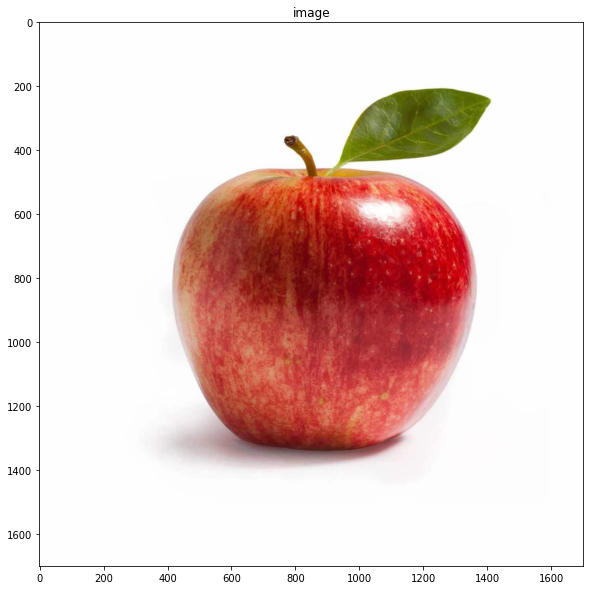

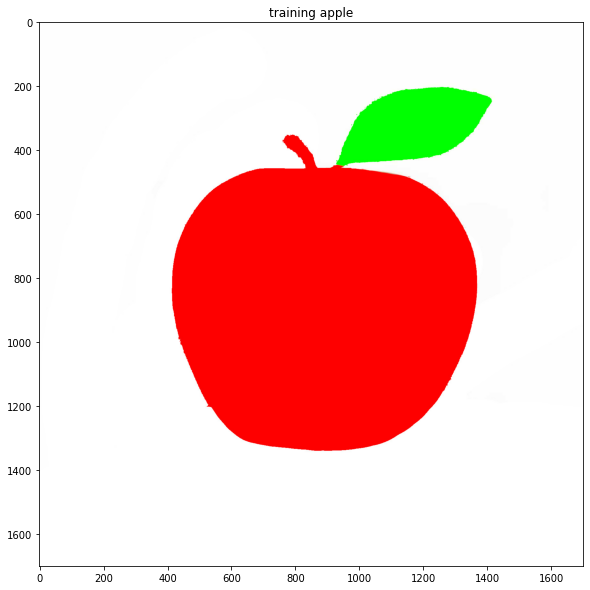

In [7]:
# train the model
# img = 'compressed/a.png'
# imgTrain = 'compressed/at.png'
# img = 'compressed/a1.jpeg'
# imgTrain = 'compressed/a1t.png'
img = os.path.join('normal size','a2.jpg')
imgTrain = os.path.join('normal size','a2t.jpg')
nb = NB(img,imgTrain)

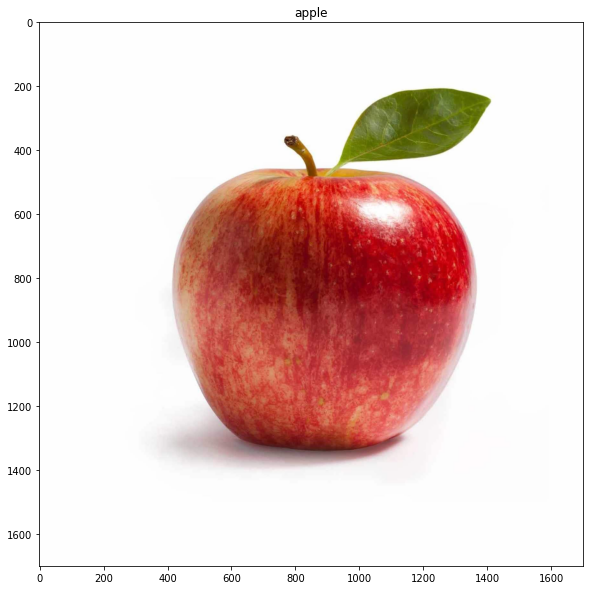

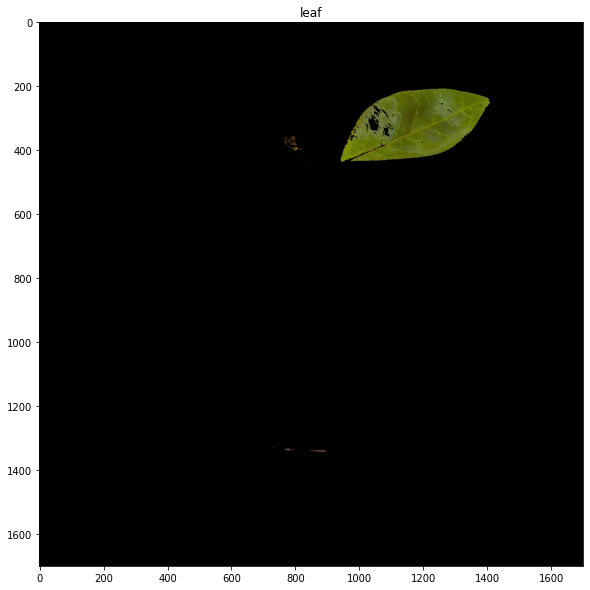

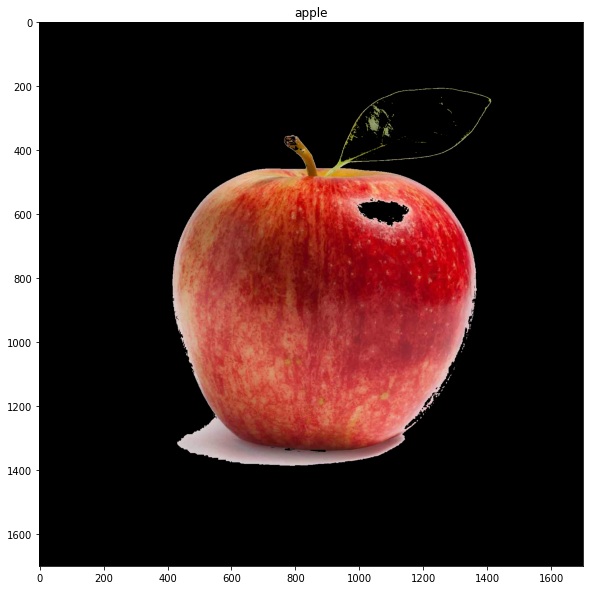

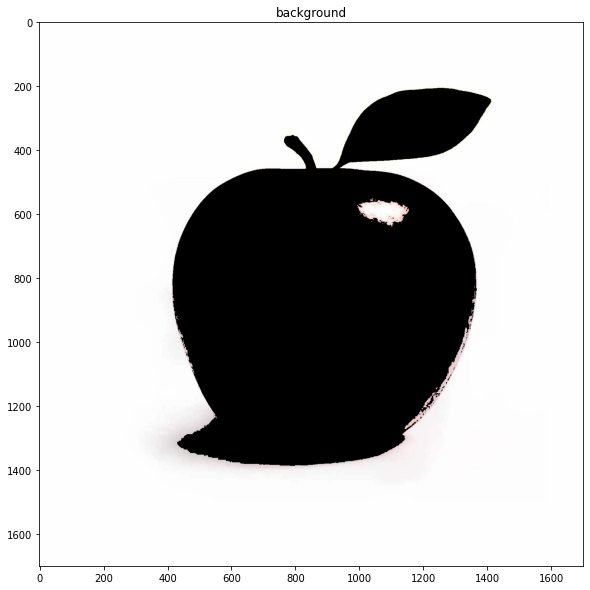

In [4]:
nb.test(img)

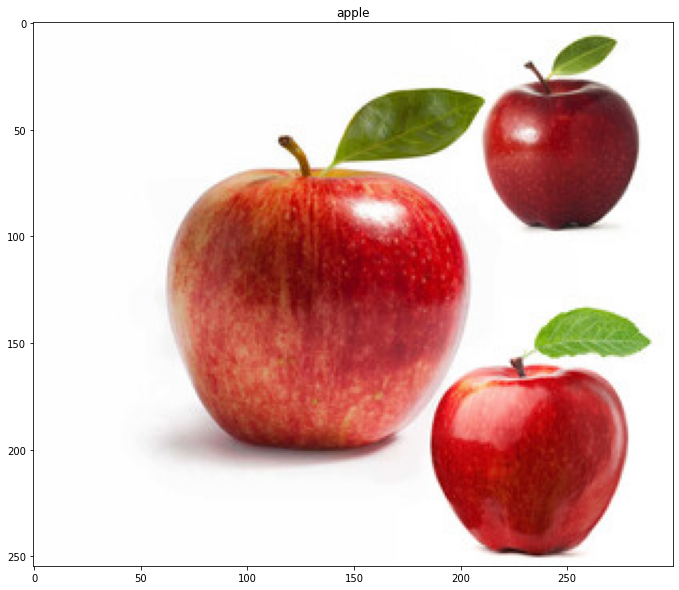

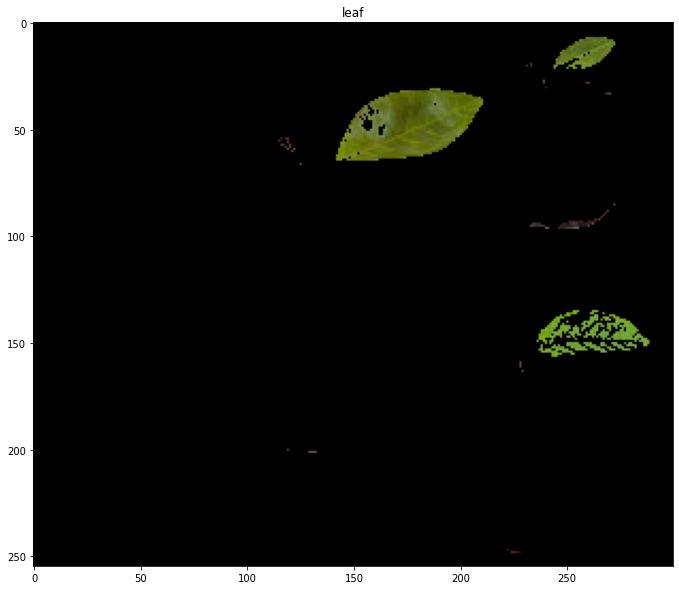

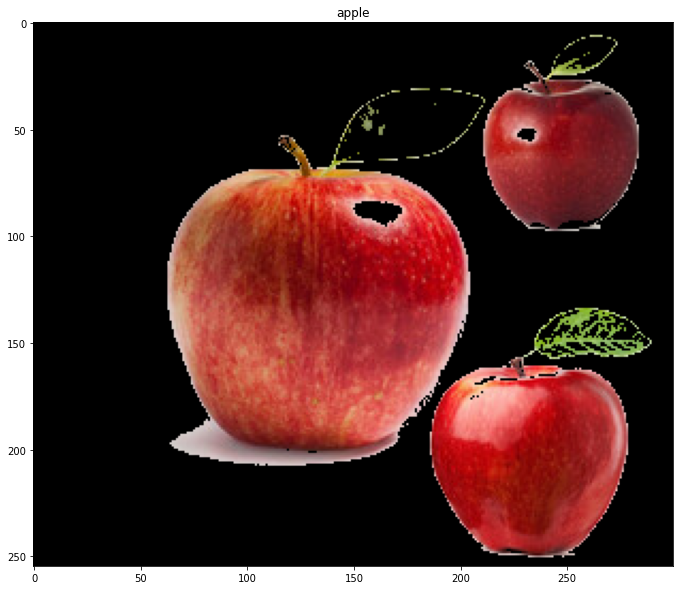

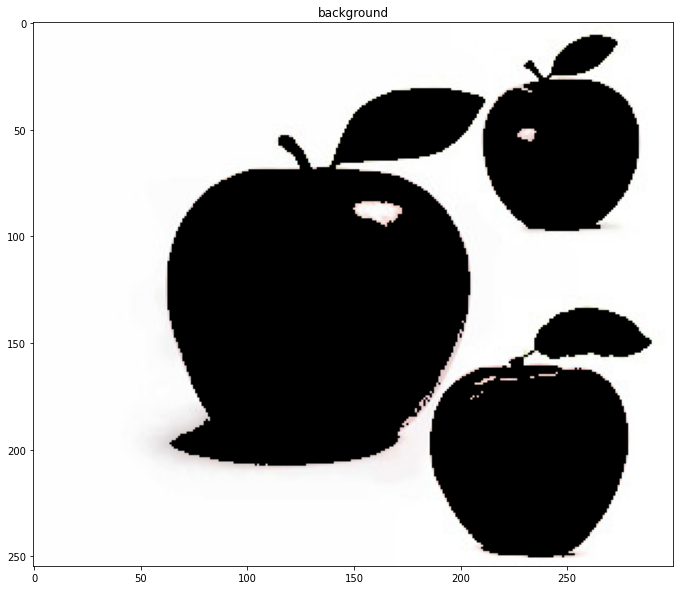

In [5]:
# now we will classify every single pixel and draw it on a new image
# nb.test('compressed/a2.jpg')
# nb.test('compressed/a3.jpeg')
nb.test(os.path.join('compressed','aa.jpg'))
# nb.test('compressed/a.png')
# nb.test('a1.jpeg')
# nb.test('a2.jpg')
# nb.test('a3.jpeg')